In [36]:
import csv
import numpy as np
# Nombre del archivo CSV
archivo_csv = "Torque magnético.csv"

# Diccionario para almacenar las listas por columna
columnas = {}

# Abrir el archivo CSV y leer los datos
with open(archivo_csv, newline='', encoding='utf-8') as csvfile:
    reader = csv.reader(csvfile,delimiter=";")
    
    # Leer la primera fila que contiene los encabezados
    encabezados = next(reader)
    
    # Inicializar listas vacías en el diccionario por cada encabezado
    for encabezado in encabezados:
        columnas[encabezado] = []

    # Leer los datos de cada fila, convertir a float y agregarlos a las listas correspondientes
    for fila in reader:
        for i, valor in enumerate(fila):
            valor_float = float(valor) if valor.strip() != "" else None
            columnas[encabezados[i]].append(valor_float)

# Imprimir las listas por columna
for encabezado, lista in columnas.items():
    print(f'Columna "{encabezado}": {lista}')

Columna "﻿r(m)": [0.0265, 0.0365, 0.0465, 0.0565, 0.0665, 0.0765, 0.0865]
Columna "I(A)": [1.0, 1.4, 1.8, 2.2, 2.6, 3.0, 3.4]
Columna "T": [1.55, 7.4, 1.5, 7.0, 1.45, 6.6, 1.4, 6.2, 1.35, 5.8, 1.3, 5.4, None, 5.0]
Columna "I2(A)": [1.0, 1.1, 1.2, 1.3, 1.4, 1.5, None]
Columna "B(T)": [0.00462347598075479, 0.00469947832564391, 0.00474279148993556, 0.00477077256067264, 0.00479033827178955, 0.0048047887643138, 0.00481589810249719]
Columna "F": [0.135135135135135, 0.142857142857143, 0.151515151515152, 0.161290322580645, 0.172413793103448, 0.185185185185185, 0.2]
Columna "I3": [1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0]


In [6]:
g=9.81
m=141.3+1.5+1.1
A = columnas["﻿r(m)"]
X=[]
for i in range(len(A)):
    if A[i]== None:
        pass
    else:
        X.append(A[i]*g*m)

B=columnas["B(T)"]
Y=[]
for i in range(len(B)):
    if B[i]== None:
        pass
    else:
        Y.append(B[i])

[0.0046601382824702445, 0.004689975211913851, 0.0047198121413574564, 0.004749649070801063, 0.004779486000244669, 0.004809322929688275, 0.004839159859131881]
0.004581070419444689


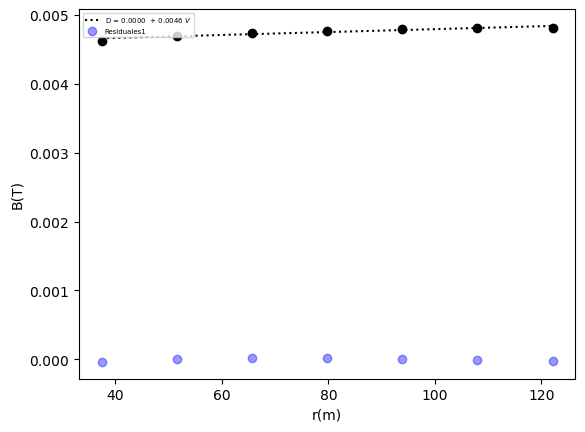

La incertidumbre en el pendiente es de 0.0
La incertidumbre en el intercepto es de 0.0


In [10]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress

# Realizar la regresión por mínimos cuadrados
slope1, intercept1, r_value1, p_value1, std_err1 = linregress(X, Y)
regression_line1 = [(slope1 * x) + intercept1 for x in X]
Label = "D"
#Incertidumbre de la pendiente y de el intercepto en y

delta_m1 = std_err1
delta_b1 = std_err1 * np.sqrt(np.mean(np.array(X)**2))

# Calcular los residuales
residuales1 = [y1 - ((slope1 * x) + intercept1) for x, y1 in zip(X, Y)]
#residuales2 = [y2 - ((slope2 * x) + intercept2) for x, y2 in zip(X, Y2)]

# Crear la gráfica
plt.scatter(X, Y, color='black')
#plt.scatter(X, Y2, label='Diametro2', color='red')
plt.plot(X, regression_line1, label=f'{Label} = {slope1:.4f}  + {intercept1:.4f} $V$', color='black',linestyle='dotted')
#plt.plot(X, regression_line2, label=f'{Label} = {slope2:.4f}  + {intercept2:.4f} $V$', color='red',linestyle='dotted')
plt.scatter(X, residuales1, label='Residuales1', alpha=0.4, color='blue')
#plt.scatter(X, residuales2, label='Residuales2', alpha=0.4, color='green')
print(regression_line1)
print(intercept1)
plt.xlabel('r(m)')
plt.ylabel("B(T)")
#plt.title('D vs 1/ V^(-1/2)')
legend = plt.legend(fontsize="5",loc='upper left')
legend.set_frame_on(True)  # Remover el rectángulo de la leyenda
plt.savefig("rvsB.png",bbox_inches='tight')
# Mostrar la gráfica
plt.show()


print(f"La incertidumbre en el pendiente es de {round(delta_m1,4)}")
print(f"La incertidumbre en el intercepto es de {round(delta_b1,4)}")

In [26]:
U=4*np.pi*10**-7
I=(2/5)*141.3*(0.0265)**2

A = columnas["T"]
X=[]
for i in range(len(A)):
    if A[i]== None:
        pass
    else:
        X.append(A[i]**2)

B=columnas["I2(A)"]
Y=[]
for i in range(len(B)):
    if B[i]== None:
        pass
    else:
        Y.append((I*4*np.pi**2)/((B[i]*U*195)/(2*0.0265)))
print(Y)

[338.9105060755041, 308.10046006864013, 282.4254217295868, 260.70038928884935, 242.07893291107442, 225.94033738366946]


[333.8520294899285, 309.803659320309, 286.5437603037919, 264.07233244037695, 242.3893757300644, 221.49489017285407]
-45.00835957571553


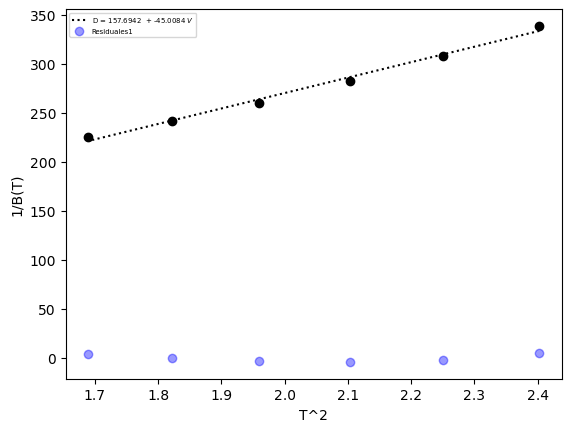

La incertidumbre en el pendiente es de 7.3423
La incertidumbre en el intercepto es de 15.0693


In [27]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress

# Realizar la regresión por mínimos cuadrados
slope1, intercept1, r_value1, p_value1, std_err1 = linregress(X, Y)
regression_line1 = [(slope1 * x) + intercept1 for x in X]
Label = "D"
#Incertidumbre de la pendiente y de el intercepto en y

delta_m1 = std_err1
delta_b1 = std_err1 * np.sqrt(np.mean(np.array(X)**2))

# Calcular los residuales
residuales1 = [y1 - ((slope1 * x) + intercept1) for x, y1 in zip(X, Y)]
#residuales2 = [y2 - ((slope2 * x) + intercept2) for x, y2 in zip(X, Y2)]

# Crear la gráfica
plt.scatter(X, Y, color='black')
#plt.scatter(X, Y2, label='Diametro2', color='red')
plt.plot(X, regression_line1, label=f'{Label} = {slope1:.4f}  + {intercept1:.4f} $V$', color='black',linestyle='dotted')
#plt.plot(X, regression_line2, label=f'{Label} = {slope2:.4f}  + {intercept2:.4f} $V$', color='red',linestyle='dotted')
plt.scatter(X, residuales1, label='Residuales1', alpha=0.4, color='blue')
#plt.scatter(X, residuales2, label='Residuales2', alpha=0.4, color='green')
print(regression_line1)
print(intercept1)
plt.ylabel('T^2')
plt.xlabel("1/B(T)")
#plt.title('D vs 1/ V^(-1/2)')
legend = plt.legend(fontsize="5",loc='upper left')
legend.set_frame_on(True)  # Remover el rectángulo de la leyenda
plt.savefig("TvsB.png",bbox_inches='tight')
# Mostrar la gráfica
plt.show()


print(f"La incertidumbre en el pendiente es de {round(delta_m1,4)}")
print(f"La incertidumbre en el intercepto es de {round(delta_b1,4)}")

In [28]:
print(1/slope1)

0.006341386086640285


In [38]:
A = columnas["F"]
X=[]
for i in range(len(A)):
    if A[i]== None:
        pass
    else:
        X.append(A[i])

B=columnas["I3"]
Y=[]
for i in range(len(B)):
    if B[i]== None:
        pass
    else:
        Y.append(((B[i]*U*195)/(2*0.0265)))

[0.005401060443768525, 0.007045138233896898, 0.008888498180404478, 0.010969711023235393, 0.013337987706456916, 0.01605712019460019, 0.01921131388084641]
-0.023370300883476976


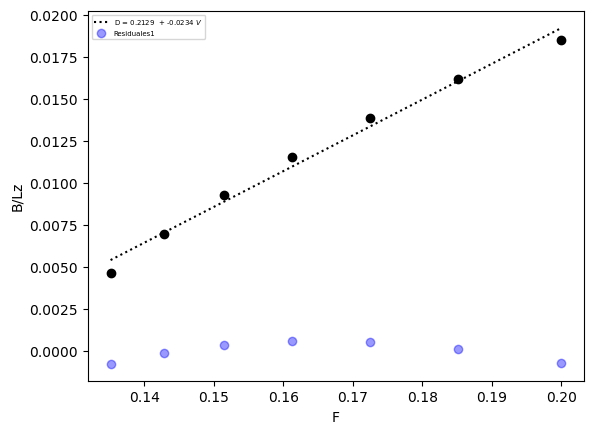

La incertidumbre en el pendiente es de 0.0108
La incertidumbre en el intercepto es de 0.0018


In [39]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress

# Realizar la regresión por mínimos cuadrados
slope1, intercept1, r_value1, p_value1, std_err1 = linregress(X, Y)
regression_line1 = [(slope1 * x) + intercept1 for x in X]
Label = "D"
#Incertidumbre de la pendiente y de el intercepto en y

delta_m1 = std_err1
delta_b1 = std_err1 * np.sqrt(np.mean(np.array(X)**2))

# Calcular los residuales
residuales1 = [y1 - ((slope1 * x) + intercept1) for x, y1 in zip(X, Y)]
#residuales2 = [y2 - ((slope2 * x) + intercept2) for x, y2 in zip(X, Y2)]

# Crear la gráfica
plt.scatter(X, Y, color='black')
#plt.scatter(X, Y2, label='Diametro2', color='red')
plt.plot(X, regression_line1, label=f'{Label} = {slope1:.4f}  + {intercept1:.4f} $V$', color='black',linestyle='dotted')
#plt.plot(X, regression_line2, label=f'{Label} = {slope2:.4f}  + {intercept2:.4f} $V$', color='red',linestyle='dotted')
plt.scatter(X, residuales1, label='Residuales1', alpha=0.4, color='blue')
#plt.scatter(X, residuales2, label='Residuales2', alpha=0.4, color='green')
print(regression_line1)
print(intercept1)
plt.xlabel('F')
plt.ylabel("B/Lz")
#plt.title('D vs 1/ V^(-1/2)')
legend = plt.legend(fontsize="5",loc='upper left')
legend.set_frame_on(True)  # Remover el rectángulo de la leyenda
plt.savefig("FvsB.png",bbox_inches='tight')
# Mostrar la gráfica
plt.show()


print(f"La incertidumbre en el pendiente es de {round(delta_m1,4)}")
print(f"La incertidumbre en el intercepto es de {round(delta_b1,4)}")